# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [3]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv")

In [5]:
column_to_drop<-c("X.1","X")
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired column

In [10]:
training_set
training_set$id = factor(training_set$id) 
pump_classifier = randomForest(id ~ ., data=training_set, ntree=100, importance=TRUE)


id,population,permit,construction_year,quality_group,quantity,Internal,Lake.Nyasa,Lake.Rukwa,Lake.Tanganyika,...,X18,X19,X20,X21,X24,X40,X60,X80,X90,X99
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
functional,-0.07262067,0.6889358,-1.2105682,0.3440186,0.81768317,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
functional,-0.08339009,0.6889358,0.0000000,0.3440186,-0.08578228,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
functional,-0.61825111,0.6889358,-1.2105682,-3.1172670,0.81768317,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
non functional,-0.07624876,0.6889358,0.0000000,0.3440186,0.81768317,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
non functional,-0.07624876,0.6889358,0.0000000,-0.8097433,0.81768317,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
non functional,0.48793255,0.6889358,0.0000000,-3.1172670,-0.08578228,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
functional,-0.08339009,0.6889358,0.0000000,0.3440186,0.81768317,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
functional,0.13555158,-1.5302158,-1.4092612,-3.1172670,0.81768317,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
functional,-0.07262067,-1.5302158,0.9750546,0.3440186,-0.98924773,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0



Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 100,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 8

        OOB estimate of  error rate: 22.36%
Confusion matrix:
                        functional functional needs repair non functional
functional                   23594                     142           1999
functional needs repair       2433                     369            598
non functional                5332                      71          12751
                        class.error
functional               0.08319409
functional needs repair  0.89147059
non functional           0.29762036

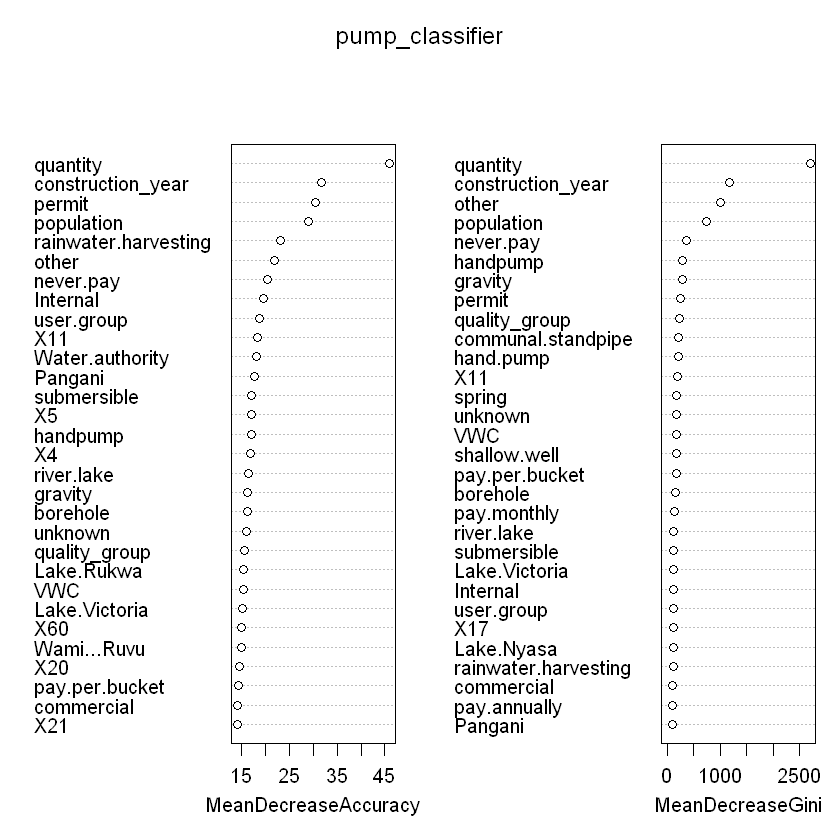

In [12]:
pump_classifier
varImpPlot(pump_classifier)

In [21]:
library(ROCR)
pred <- predict(pump_classifier,validation_set)
table(observed=validation_set$id,predicted=pred)

                         predicted
observed                  functional functional needs repair non functional
  functional                    5989                      43            491
  functional needs repair        673                      91            153
  non functional                1375                      15           3280